# Downloading files with data that are used in:
## Main_notebook_bipolar_eruptions.ipynb

### Packages

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
import warnings 
from tabulate import tabulate
from scipy import interpolate
from scipy import signal
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import itertools
from tqdm import tqdm

from matplotlib.widgets import Slider, RadioButtons

np.set_printoptions(threshold=np.inf)
sns.set_theme(context='paper', style='white', palette='bright',font='arial')

### Results from Lin et al., 2022

In [2]:
linetal = pd.ExcelFile('Supplementary tables.xls')
north_pole = pd.read_excel(linetal, 'Table S3')
south_pole = pd.read_excel(linetal, 'Table S4')

south_pole

,WDC,Unnamed: 1,Unnamed: 2,Unnamed: 3,EDC,Unnamed: 5,Unnamed: 6,Unnamed: 7,EDML,Unnamed: 9,Unnamed: 10,Unnamed: 11,Age (b2k),Average deposition (kg km-2),1δ,Deposition (min-max. kg km-2)
0,Deposition (kg km-2),1δ,Depth (m),Thinning,Deposition (kg km-2),1δ,Depth (m),Thinning,Deposition (kg km-2),1δ,Depth (m),Thinning,NaN,NaN,NaN,NaN
1,10.7,2.7,1689.93,0.604819,NaN,NaN,NaN,NaN,12.9,5.16,559.267042,0.754551,9035.886931,11.216000,4.486400,10.7-12.9
2,30.3,7.6,1702.975,0.601275,NaN,NaN,NaN,NaN,11,4.4,565.032256,0.748053,9166.253537,17.081500,6.832600,11.0-30.3
3,NaN,NaN,NaN,NaN,13.2,5.28,283.159,0.935584,NaN,NaN,NaN,NaN,9171.477585,18.348000,7.339200,13.204596
4,19.6,4.9,1704.625,0.600812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9180.706134,13.916000,3.479000,19.554778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,12.7,3.2,3362.475,0.052154,NaN,NaN,NaN,NaN,28.7,11.48,1671.210765,0.374243,59596.692823,21.011000,8.404400,12.7-28.7
734,57.8,14.5,3362.965,0.051968,51.3,20.52,946.1585,0.709441,104.9,41.96,1672.373109,0.375298,59650.604808,71.333333,40.176997,51.3-104.9
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,4.44,1673.326732,0.376132,59696.873530,12.765000,5.106000,11.1
736,NaN,NaN,NaN,NaN,15.6,6.24,949.614,0.708471,NaN,NaN,NaN,NaN,59904.706494,21.684000,8.673600,15.6


In [3]:
north_pole = np.array(north_pole)
south_pole = np.array(south_pole)

NGRIP_dep = north_pole[1:,0]
NGRIP_dep_age = north_pole[1:,12]
EDML_dep = south_pole[1:,8]
EDML_dep_age = south_pole[1:,12]

NGRIP_jiamei_dep = np.array(NGRIP_dep, dtype='float64')
NGRIP_jiamei_age = np.array(NGRIP_dep_age, dtype='float64')
EDML_jiamei_dep = np.array(EDML_dep, dtype='float64')
EDML_jiamei_age = np.array(EDML_dep_age, dtype='float64')

%store NGRIP_jiamei_dep
%store NGRIP_jiamei_age
%store EDML_jiamei_dep
%store EDML_jiamei_age

Stored 'NGRIP_jiamei_dep' (ndarray)
Stored 'NGRIP_jiamei_age' (ndarray)
Stored 'EDML_jiamei_dep' (ndarray)
Stored 'EDML_jiamei_age' (ndarray)


### Results from Lin et al., 2022 and Kristiansen, 2020. 

In [4]:
sheet = pd.ExcelFile('Bipolar_sulfate_20200516_AS.xlsx')
JL = pd.read_excel(sheet, 'JL' )
SK = pd.read_excel(sheet, 'SK')
JL_SK = pd.read_excel(sheet, 'All bipolar')

JL_SK

,Eruption,NGRIP,GICC05,NGRIP SO4 (kg/km2),Unnamed: 4,NEEM SO4 (kg/km2),Unnamed: 6,GISP2 SO4 (kg/km2),Unnamed: 8,EDML SO4 (kg/km2),...,EDC SO4 (kg/km2),Unnamed: 12,WDC SO4 (kg/km2),Unnamed: 14,Greenland,Antarctica,Row JL,Row SK,Unnamed: 19,Unnamed: 20
0,NaN,depth (m),age (b2k),SK,JL,SK,JL,SK,JL,SK,...,SK,JL,SK,JL,SO4 (kg/km2),SO4 (kg/km2),NaN,NaN,NaN,NaN
1,Vedde ash,1506.157,12170.4,228.633194,205.06851,411.662003,399.803981,172.830145,180.505308,6.111595,...,NaN,NaN,18.550751,20.429385,266.41719,12.978854,2.0,2.0,1506.157000,1506.114
2,NaN,1508.071042,12240.690909,70.737762,60.960361,NaN,NaN,65.103074,69.044287,23.486554,...,NaN,NaN,36.787684,35.344525,66.461371,29.439317,3.0,3.0,1508.071042,1508.049
3,NaN,1522.265,12754.814815,210.958474,223.953752,NaN,NaN,111.491289,115.96404,16.665978,...,NaN,NaN,26.948301,24.618971,165.591889,20.641238,4.0,4.0,1522.265000,1522.197
4,Onset YD 4 spikes,1527.44,12917.333333,340.208452,336.698172,218.877606,217.002103,237.953103,250.818042,37.662537,...,49.758784,36.265869,102.057062,105.941522,266.926246,61.247234,5.0,5.0,1527.440000,1527.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,2403.609,58355.241379,123.718947,90.736138,NaN,NaN,NaN,NaN,63.422503,...,40.448385,32.26393,37.955568,10.817603,107.227543,41.040542,83.0,83.0,2403.609000,2403.591
76,NaN,2416.254,59180.090909,13.870702,12.797616,NaN,NaN,NaN,NaN,54.132978,...,26.811608,27.129,25.740169,50.86074,13.334159,39.937425,84.0,84.0,2416.254000,2416.261
77,NaN,2417.926,59316.551724,41.365312,33.254975,NaN,NaN,NaN,NaN,45.942251,...,30.79928,30.565975,114.733784,98.544067,37.310143,60.952374,85.0,85.0,2417.926000,2417.900
78,NaN,2421.738,59545.142857,73.405805,74.524378,NaN,NaN,182.519229,182.449348,36.746638,...,54.365874,55.29261,29.496488,26.395936,128.22469,39.694764,86.0,86.0,2421.738000,2421.724


In [5]:
JL_SK = np.array(JL_SK)
JL_bp_EDC_s = JL_SK[:,12]
SK_bp_EDC_s = JL_SK[:,11]
JL_SK_bp_age = JL_SK[:,2]
JL_SK_bp_depth_NGRIP = JL_SK[:,1]
SK_bp_s_NGRIP = JL_SK[:,3]
JL_bp_s_NGRIP = JL_SK[:,4]

%store JL_bp_EDC_s
%store SK_bp_EDC_s
%store JL_SK_bp_age

Stored 'JL_bp_EDC_s' (ndarray)
Stored 'SK_bp_EDC_s' (ndarray)
Stored 'JL_SK_bp_age' (ndarray)


In [6]:
SK = np.array(SK)

SK_EDC_age = SK[:,16]
SK_EDC_s = SK[:,12]

%store SK_EDC_age
%store SK_EDC_s

Stored 'SK_EDC_age' (ndarray)
Stored 'SK_EDC_s' (ndarray)


In [7]:
JL = np.array(JL)

JL_EDML_age_start = JL[:,14] 
JL_EDML_age_middle = JL[:,15] 
JL_EDML_age_end = JL[:,16] 
JL_EDML_s = JL[:,17]  

JL_EDC_age_start = np.array(JL[:,8], dtype='float64')
JL_EDC_age_middle = np.array(JL[:,10], dtype='float64')
JL_EDC_age_end = np.array( JL[:,9], dtype='float64' )
JL_EDC_s = np.array(JL[:,11], dtype='float64')  

JL_NGRIP_age_start = np.array(JL[:,20], dtype='float64')
JL_NGRIP_age_middle = np.array(JL[:,21], dtype='float64')
JL_NGRIP_age_end = np.array( JL[:,22], dtype='float64' )
JL_NGRIP_s = np.array(JL[:,23], dtype='float64')  

JL_NEEM_age = np.array(JL[:,0], dtype='float64')
JL_NEEM_age_start = np.array(JL[:,2], dtype='float64')
JL_NEEM_age_middle = np.array(JL[:,7], dtype='float64')
JL_NEEM_age_end = np.array( JL[:,3], dtype='float64' )
JL_NEEM_s = np.array(JL[:,4], dtype='float64')  

plt.figure()
plt.bar(JL_EDC_age_start[~np.isnan(JL_EDC_age_start)], JL_EDC_s[~np.isnan(JL_EDC_s)], width=100)
plt.close()

%store JL_EDML_age_start
%store JL_EDML_age_middle
%store JL_EDML_age_end
%store JL_EDML_s

%store JL_EDC_age_start
%store JL_EDC_age_middle
%store JL_EDC_age_end
%store JL_EDC_s

%store JL_NGRIP_age_start
%store JL_NGRIP_age_middle
%store JL_NGRIP_age_end
%store JL_NGRIP_s

%store JL_NEEM_age
%store JL_NEEM_age_start
%store JL_NEEM_age_middle
%store JL_NEEM_age_end
%store JL_NEEM_s

Stored 'JL_EDML_age_start' (ndarray)
Stored 'JL_EDML_age_middle' (ndarray)
Stored 'JL_EDML_age_end' (ndarray)
Stored 'JL_EDML_s' (ndarray)
Stored 'JL_EDC_age_start' (ndarray)
Stored 'JL_EDC_age_middle' (ndarray)
Stored 'JL_EDC_age_end' (ndarray)
Stored 'JL_EDC_s' (ndarray)
Stored 'JL_NGRIP_age_start' (ndarray)
Stored 'JL_NGRIP_age_middle' (ndarray)
Stored 'JL_NGRIP_age_end' (ndarray)
Stored 'JL_NGRIP_s' (ndarray)
Stored 'JL_NEEM_age' (ndarray)
Stored 'JL_NEEM_age_start' (ndarray)
Stored 'JL_NEEM_age_middle' (ndarray)
Stored 'JL_NEEM_age_end' (ndarray)
Stored 'JL_NEEM_s' (ndarray)


### Bipolar match points 

In [8]:
sheet1 = pd.ExcelFile('Bipolar match points 2022-10-13.xls')

bipolar = pd.read_excel(sheet1, 'Sheet1')

In [9]:
## Retrieving all arrays from Bipolar excel sheet ##
bipolar = np.array(bipolar)

## Greenland ## 
NGRIP_depth_b = bipolar[:,0]
#EGRIP_depth_b = bipolar[:,7]
NEEM_depth_b = bipolar[:,4]
#GRIP_depth_b = bipolar[:,5]
GISP2_depth_b = bipolar[:,6]


## Antarctica ##
EDML_depth_b = bipolar[:,1]
EDC_depth_b = bipolar[:,2]
#WD_depth_m = bipolar[:,3]
#Dome_fuji_depth_m = bipolar[:,8]
#TALDICE_depth_m = bipolar[:,9]

NGRIP_age_GICC05_b2k = bipolar[:,10]
GI_GS = bipolar[:,11]
EDML_EDC_link = bipolar[:,12]

NGRIP_age_GICC05_b2k[NGRIP_age_GICC05_b2k=='236xx'] = np.nan
NGRIP_age_GICC05_b2k[NGRIP_age_GICC05_b2k=='~62 ka'] = 62000

%store NGRIP_depth_b
%store NEEM_depth_b
%store GISP2_depth_b
%store EDML_depth_b
%store EDC_depth_b
%store GI_GS
%store EDML_EDC_link
%store NGRIP_age_GICC05_b2k

Stored 'NGRIP_depth_b' (ndarray)
Stored 'NEEM_depth_b' (ndarray)
Stored 'GISP2_depth_b' (ndarray)
Stored 'EDML_depth_b' (ndarray)
Stored 'EDC_depth_b' (ndarray)
Stored 'GI_GS' (ndarray)
Stored 'EDML_EDC_link' (ndarray)
Stored 'NGRIP_age_GICC05_b2k' (ndarray)


### NGRIP A - CFA

In [10]:
sheet2 = pd.ExcelFile('NGRIP_CFA_on_GICC05_A.xls')

NGRIP_A = pd.read_excel(sheet2, 'Sheet1')

In [11]:
NGRIP_A = np.array(NGRIP_A)

NGRIP_A_depth = NGRIP_A[:,0]
NGRIP_A_sulfate = NGRIP_A[:,1]
NGRIP_A_cond = NGRIP_A[:,2]
NGRIP_A_age = NGRIP_A[:,3]

### NGRIP B - CFA

In [12]:
sheet3 = pd.ExcelFile('NGRIP_CFA_on_GICC05_B.xls')

NGRIP_B = pd.read_excel(sheet3, 'Sheet1')

In [13]:
NGRIP_B = np.array(NGRIP_B)

NGRIP_B_depth = NGRIP_B[:,0]
NGRIP_B_sulfate = NGRIP_B[:,1]
NGRIP_B_cond = NGRIP_B[:,2]
NGRIP_B_age = NGRIP_B[:,3]

### NGRIP C - CFA

In [14]:
sheet4 = pd.ExcelFile('NGRIP_CFA_on_GICC05_C.xls')

NGRIP_C = pd.read_excel(sheet4, 'Sheet1')

In [15]:
NGRIP_C = np.array(NGRIP_C)

NGRIP_C_depth = NGRIP_C[:,0]
NGRIP_C_sulfate = NGRIP_C[:,1]
NGRIP_C_cond = NGRIP_C[:,2]
NGRIP_C_age = NGRIP_C[:,3]

### NGRIP - ALL

In [16]:
### Making sure that there are no duplicates in data points ###
idx_A = np.where(NGRIP_A_age == NGRIP_B_age[0])[0][0]
idx_B = np.where(NGRIP_B_age == NGRIP_C_age[0])[0][0]
NGRIP_A_age_s = NGRIP_A_age[:idx_A]
NGRIP_B_age_s = NGRIP_B_age[:idx_B]
NGRIP_A_depth_s = NGRIP_A_depth[:idx_A]
NGRIP_B_depth_s = NGRIP_B_depth[:idx_B]
NGRIP_A_sulfate_s = NGRIP_A_sulfate[:idx_A]
NGRIP_B_sulfate_s = NGRIP_B_sulfate[:idx_B]
NGRIP_A_cond_s = NGRIP_A_cond[:idx_A]
NGRIP_B_cond_s = NGRIP_B_cond[:idx_B]

### Concatenate the arrays to represent the whole core ###
NGRIP_age = np.concatenate((NGRIP_A_age_s, NGRIP_B_age_s, NGRIP_C_age), axis=None)
NGRIP_sulfate = np.concatenate((NGRIP_A_sulfate_s, NGRIP_B_sulfate_s, NGRIP_C_sulfate), axis=None)
NGRIP_depth = np.concatenate((NGRIP_A_depth_s, NGRIP_B_depth_s, NGRIP_C_depth), axis=None)
NGRIP_cond = np.concatenate((NGRIP_A_cond_s, NGRIP_B_cond_s, NGRIP_C_cond), axis=None)

%store NGRIP_age
%store NGRIP_sulfate
%store NGRIP_depth
%store NGRIP_cond

Stored 'NGRIP_age' (ndarray)
Stored 'NGRIP_sulfate' (ndarray)
Stored 'NGRIP_depth' (ndarray)
Stored 'NGRIP_cond' (ndarray)


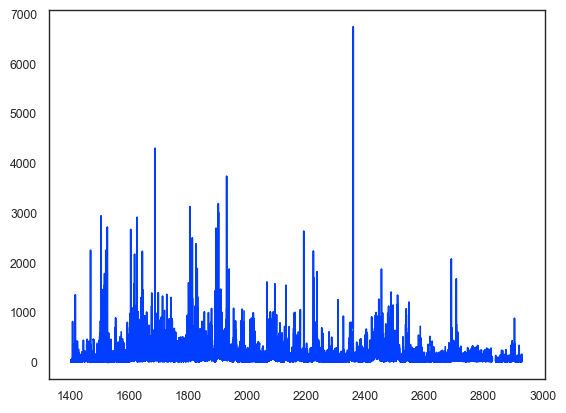

In [17]:
plt.figure()
plt.plot(NGRIP_depth, NGRIP_sulfate)
plt.show()

## NGRIP d18O + thinning

In [18]:
sheet5 = pd.ExcelFile('2010-11-19 GICC05modelext for NGRIP.xls')
NGRIP_dO18_excel = pd.read_excel(sheet5, 'GICC05')
sheet6 = pd.ExcelFile('AICC2012_official.xls')
#thinning = pd.read_excel(sheet6, 'NGRIP')
excl= pd.ExcelFile('jafna-ngrip-ss09sea06bm1.xls')
NGRIP_th = pd.read_excel(excl, 'jafna-ngrip-ss09sea06bm1')
NGRIP_th = np.array(NGRIP_th, dtype='float64')

##thinning arrays
NGRIP_thinning_depth = NGRIP_th[:,0]
NGRIP_thinning = NGRIP_th[:,3]

### Pandas to arrays ### 
NGRIP_dO18_excel = np.array(NGRIP_dO18_excel)
#thinning = np.array(thinning)

#age and depth values refer to the bottom of each interval (which sulfate is also)
NGRIP_dO18_age = NGRIP_dO18_excel[69:,0]
NGRIP_dO18_depth = NGRIP_dO18_excel[69:,1]
NGRIP_dO18 = NGRIP_dO18_excel[69:,2]
NGRIP_dO18_MCE = NGRIP_dO18_excel[69:,3]

### thinning arrays ###
#NGRIP_thinning_depth = thinning[1:,0]
#NGRIP_thinning = thinning[1:,6]

%store NGRIP_dO18_age
%store NGRIP_dO18_depth
%store NGRIP_dO18
%store NGRIP_dO18_MCE
%store NGRIP_thinning_depth
%store NGRIP_thinning

Stored 'NGRIP_dO18_age' (ndarray)
Stored 'NGRIP_dO18_depth' (ndarray)
Stored 'NGRIP_dO18' (ndarray)
Stored 'NGRIP_dO18_MCE' (ndarray)
Stored 'NGRIP_thinning_depth' (ndarray)
Stored 'NGRIP_thinning' (ndarray)


### NEEM

In [19]:
sheet5 = pd.ExcelFile('NEEM_sulfate_on_GICC05.xls')

NEEM = pd.read_excel(sheet5, 'Sheet1') 

In [20]:
NEEM = np.array(NEEM)

NEEM_age = NEEM[:,12]
NEEM_sulfate = NEEM[:,10]
NEEM_depth_top = NEEM[:,0]
NEEM_depth_bottom = NEEM[:,1]

%store NEEM_age
%store NEEM_sulfate
%store NEEM_depth_top
%store NEEM_depth_bottom

Stored 'NEEM_age' (ndarray)
Stored 'NEEM_sulfate' (ndarray)
Stored 'NEEM_depth_top' (ndarray)
Stored 'NEEM_depth_bottom' (ndarray)


### GISP2 - IC

In [21]:
sheet6 = pd.ExcelFile('GISP2_IC_on_GICC05.xls')

GISP2 = pd.read_excel(sheet6, 'Sheet1')

In [22]:
GISP2 = np.array(GISP2)

GISP2_age = GISP2[:,11]
GISP2_sulfate = GISP2[:,9]
GISP2_depth_top = GISP2[:,0]
GISP2_depth_bottom = GISP2[:,1]

%store GISP2_age
%store GISP2_sulfate
%store GISP2_depth_top
%store GISP2_depth_bottom

Stored 'GISP2_age' (ndarray)
Stored 'GISP2_sulfate' (ndarray)
Stored 'GISP2_depth_top' (ndarray)
Stored 'GISP2_depth_bottom' (ndarray)


### EDML A - FIC

In [23]:
sheet7 = pd.ExcelFile('EDML_FIC_on_GICC05.xls')

EDML_A = pd.read_excel(sheet7, 'Sheet1')

### EDML B - FIC

In [24]:
sheet8 = pd.ExcelFile('EDML_FIC_on_GICC05_B.xls')

EDML_B = pd.read_excel(sheet8, 'Sheet1')

In [25]:
EDML_A = np.array(EDML_A)
EDML_B = np.array(EDML_B)

EDML_A_depth = EDML_A[:,0]
EDML_B_depth = EDML_B[10001:,0]
print(EDML_A_depth[-1], EDML_B_depth[0])
EDML_depth = np.concatenate((EDML_A_depth, EDML_B_depth), axis=None)

EDML_A_sulfate = EDML_A[:,1]
EDML_B_sulfate = EDML_B[10001:,1]
EDML_sulfate = np.concatenate((EDML_A_sulfate, EDML_B_sulfate), axis=None)

EDML_A_age = EDML_A[:,2]
EDML_B_age = EDML_B[10001:,2]
EDML_age = np.concatenate((EDML_A_age, EDML_B_age), axis=None)

%store EDML_age
%store EDML_sulfate
%store EDML_depth

%store -r EDML_sulfate_all
%store -r EDML_age_all
%store -r EDML_depth_all

EDML_age = np.copy(EDML_age_all)
EDML_sulfate = np.copy(EDML_sulfate_all)
EDML_depth = np.copy(EDML_depth_all)

len(EDML_age), len(EDML_depth), len(EDML_sulfate)

1757.1174868040184 1757.1345138770646
Stored 'EDML_age' (ndarray)
Stored 'EDML_sulfate' (ndarray)
Stored 'EDML_depth' (ndarray)


(113241, 113241, 113241)

## EDML d18O + thinning

In [26]:
sheet9 = pd.ExcelFile('EDML_d18O_on_GICC05.xls')
d18O = pd.read_excel(sheet9, 'Sheet1')
sheet10 = pd.ExcelFile('AICC2012_official.xls')
thinning = pd.read_excel(sheet10, 'EDML')

print(thinning)

d18O = np.array(d18O)
thinning = np.array(thinning)

EDML_d18O_depth =d18O[:,0]
EDML_d18O = d18O[:,1]
EDML_d18O_age = d18O[:,2]

EDML_thinning_depth = thinning[1:,0]
EDML_thinning = thinning[1:,6]
EDML_acc = thinning[1:,5]

%store EDML_d18O
%store EDML_d18O_age
%store EDML_d18O_depth
%store EDML_thinning_depth
%store EDML_thinning
%store EDML_acc

           EDML         Unnamed: 1       Unnamed: 2         Unnamed: 3  \
0     Depth (m)  Ice age (a B1950)  Ice age std (a)  Gas age (a B1950)   
1            18                 70          85.9174                 -1   
2            21            96.7573          87.4493                 -1   
3            24            121.153          93.5505           -41.4438   
4            27            147.879          99.1783            -42.922   
...         ...                ...              ...                ...   
1560       2410             142167            11921             140600   
1561     2411.5             142694          12818.7             141108   
1562       2413             143195          13670.9             141608   
1563     2414.5             143689          14512.5                 -1   
1564       2416             144193          15369.3                 -1   

           Unnamed: 4         Unnamed: 5 Unnamed: 6    Unnamed: 7  
0     Gas age std (a)  Accu. Rate (m ie)   

## EDC

In [27]:
sheet9 = pd.ExcelFile('EDC_FIC_on_GICC05.xls')

EDC = pd.read_excel(sheet9, 'Sheet1')

In [28]:
EDC = np.array(EDC)
EDC_depth = EDC[:,0]
EDC_sulfate = EDC[:,1]
EDC_age = EDC[:,3]

%store EDC_age
%store EDC_sulfate
%store EDC_depth

Stored 'EDC_age' (ndarray)
Stored 'EDC_sulfate' (ndarray)
Stored 'EDC_depth' (ndarray)


### Multiple plots 

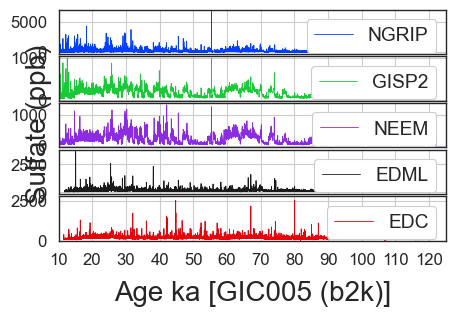

In [29]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
fig.figsize=(10,5)
ax1.plot(NGRIP_age*1e-3, NGRIP_sulfate, linewidth=.6, label = 'NGRIP', color='b')
ax2.plot(GISP2_age*1e-3, GISP2_sulfate, linewidth=.6, label ='GISP2', color='g')
ax3.plot(NEEM_age*1e-3, NEEM_sulfate, linewidth=.6, label ='NEEM', color='m')
ax4.plot(EDML_age*1e-3, EDML_sulfate, linewidth=.6, label ='EDML', color='k')
ax5.plot(EDC_age*1e-3, EDC_sulfate, linewidth=.6, label ='EDC', color='r')
plt.gcf().set_size_inches(5, 3)

plt.subplots_adjust(hspace=0.05)
#plt.gca().invert_xaxis()
#ax1.legend(fontsize = 20)
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

ax1.legend(loc='upper right', fontsize='x-large', frameon=True, fancybox=True, framealpha = 1.0)
ax2.legend(loc='upper right', fontsize='x-large', frameon=True, fancybox=True, framealpha = 1.0)
ax3.legend(loc='upper right', fontsize='x-large', frameon=True, fancybox=True, framealpha = 1.0)
ax4.legend(loc='upper right', fontsize='x-large', frameon=True, fancybox=True, framealpha = 1.0)
ax5.legend(loc='upper right', fontsize='x-large', frameon=True, fancybox=True, framealpha = 1.0)

fig.text(0.06, .5, 'Sulfate (ppb)', va='center', rotation='vertical', fontsize=20)

ax5.set_ylim(0,2800)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))


ax1.tick_params(axis='both', which='both', labelsize=12)
ax2.tick_params(axis='both', which='both', labelsize=12)
ax3.tick_params(axis='both', which='both', labelsize=12)
ax4.tick_params(axis='both', which='both', labelsize=12)
ax5.tick_params(axis='both', which='both', labelsize=12)



plt.xlabel('Age ka [GIC005 (b2k)]', fontsize=20, labelpad = 10)
plt.xlim(10,125)
#plt.ylabel('Sulfate (ppb)')
plt.show()